# IMDB Benchmarks

This notebook contains benchmarks for various models implemented in gobbli using the IMDB sentiment classification dataset.

In [1]:
%matplotlib inline

import logging

from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

from gobbli.dataset.imdb import IMDBDataset
from gobbli.model.fasttext import FastText
from gobbli.model.bert import BERT
from gobbli.model.mtdnn import MTDNN
from gobbli.model.transformer import Transformer

import benchmark
benchmark.init_benchmark_env()

In [2]:
ds = IMDBDataset.load()
X_train_valid, X_test = ds.X_train(), ds.X_test()
y_train_valid, y_test = ds.y_train(), ds.y_test()

In [3]:
X_train_valid_fasttext, X_test_fasttext = benchmark.fasttext_preprocess(X_train_valid), benchmark.fasttext_preprocess(X_test)
X_train_valid_bert, X_test_bert = benchmark.bert_preprocess(X_train_valid), benchmark.bert_preprocess(X_test)

In [4]:
def analyze_results(results):
    display(pd.DataFrame(results.training_results))
    
    print(results.metrics_report())
    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    ax = results.plot(ax=ax)
    
    plt.show()

def evaluate_model(model_cls, X, y, test_dataset, param_grid, run_kwargs=None):
    results = benchmark.run_benchmark_experiment(f"newsgroups_{model_cls.__name__}",
                                                 X_train_valid, y_train_valid,
                                                 model_cls, param_grid,
                                                 test_dataset=test_dataset,
                                                 worker_log_level=logging.INFO,
                                                 run_kwargs=run_kwargs)
    analyze_results(results)
    return results

(pid=77) INFO:gobbli.experiment.base:Starting build.
(pid=77) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=77) INFO:gobbli.experiment.base:Weights downloaded.
(pid=77) INFO:gobbli.experiment.base:Build finished in 3.10 sec.
(pid=77) INFO:gobbli.experiment.base:Starting training.
(pid=77) INFO:gobbli.experiment.base:Training finished in 1789.11 sec.
(pid=77) INFO:gobbli.experiment.base:RESULTS:
(pid=77) INFO:gobbli.experiment.base:  Validation loss: 0.56876105
(pid=77) INFO:gobbli.experiment.base:  Validation accuracy: 0.8824
(pid=77) INFO:gobbli.experiment.base:  Training loss: 0.5694972
(pid=78) INFO:gobbli.experiment.base:Starting build.
(pid=78) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=78) INFO:gobbli.experiment.base:Weights downloaded.
(pid=78) INFO:gobbli.experiment.base:Build finished in 20.92 sec.
(pid=78) INFO:gobbli.experiment.base:Starting training.
(pid=78) INFO:gobbli.experiment.base:Training finished in 1790.95 sec.
(pid=78) IN

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.568761,0.8824,0.569497,"[neg, pos]",benchmark_data/model/BERT/e96247689d9b4ea4bcaf...,192.168.176.2,"{'bert_model': 'bert-base-uncased', 'max_seq_l..."
1,0.723152,0.8504,0.722183,"[neg, pos]",benchmark_data/model/BERT/e836b01655c54cefb7d3...,192.168.176.2,"{'bert_model': 'scibert-uncased', 'max_seq_len..."


Metrics:
--------
Weighted F1 Score: 0.8806791429898766
Weighted Precision Score: 0.8806909370983464
Weighted Recall Score: 0.88068
Accuracy: 0.88068

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.88      0.88      0.88     12500
         pos       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000




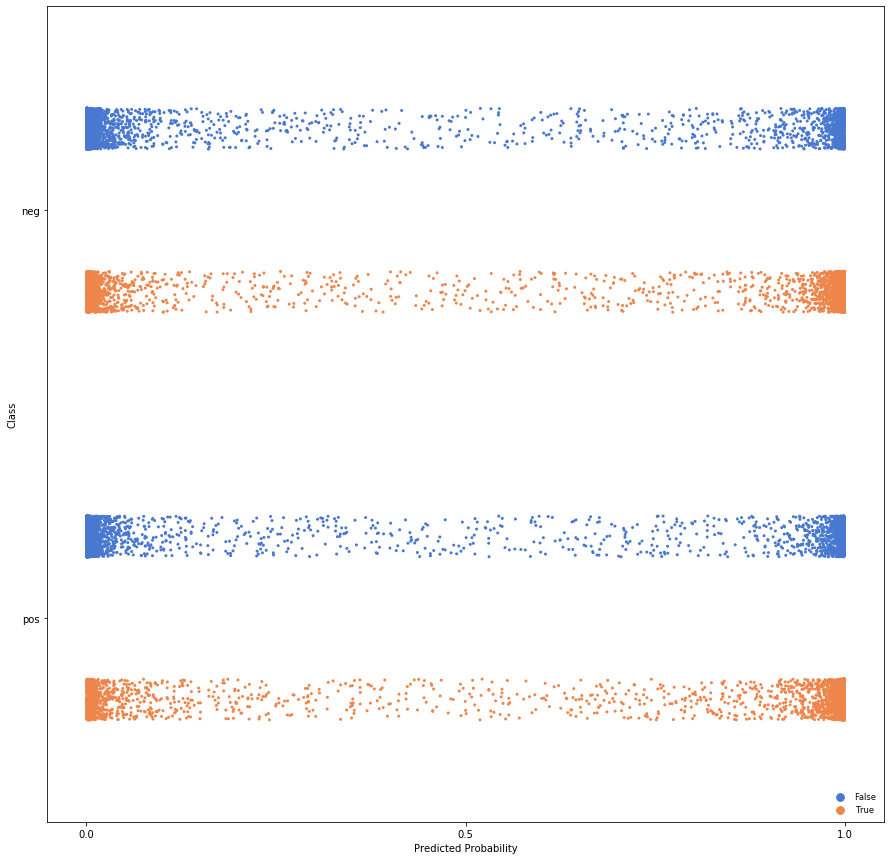

In [5]:
evaluate_model(BERT, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "bert_model": ["bert-base-uncased", "scibert-uncased"],
    "max_seq_length": [128],
});

(pid=399) INFO:gobbli.experiment.base:Starting build.
(pid=399) INFO:gobbli.experiment.base:Downloading pre-trained weights.
(pid=399) INFO:gobbli.experiment.base:Weights downloaded.
(pid=399) INFO:gobbli.experiment.base:Build finished in 1.22 sec.
(pid=399) INFO:gobbli.experiment.base:Starting training.
(pid=399) /code/gobbli/model/mtdnn/model.py:193: UserWarning: MT-DNN model does not support separate validation batch size; using train batch size '16' for both training and validation.
(pid=399)   "MT-DNN model does not support separate validation batch size; "
(pid=399) INFO:gobbli.experiment.base:Training finished in 2747.63 sec.
(pid=399) INFO:gobbli.experiment.base:RESULTS:
(pid=399) INFO:gobbli.experiment.base:  Validation loss: 0.42600885033607483
(pid=399) INFO:gobbli.experiment.base:  Validation accuracy: 0.8835999999999999
(pid=399) INFO:gobbli.experiment.base:  Training loss: 0.32458433508872986
(pid=579) INFO:gobbli.experiment.base:Starting build.
(pid=579) INFO:gobbli.expe

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.426009,0.8836,0.324584,"[neg, pos]",benchmark_data/model/MTDNN/21e0125efb8748a2bbf...,192.168.176.2,"{'max_seq_length': 128, 'mtdnn_model': 'mt-dnn..."


(pid=579) INFO:gobbli.experiment.base:Prediction finished in 184.42 sec.
Metrics:
--------
Weighted F1 Score: 0.8803160291730895
Weighted Precision Score: 0.880370479118432
Weighted Recall Score: 0.88032
Accuracy: 0.88032

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.88      0.87      0.88     12500
         pos       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000




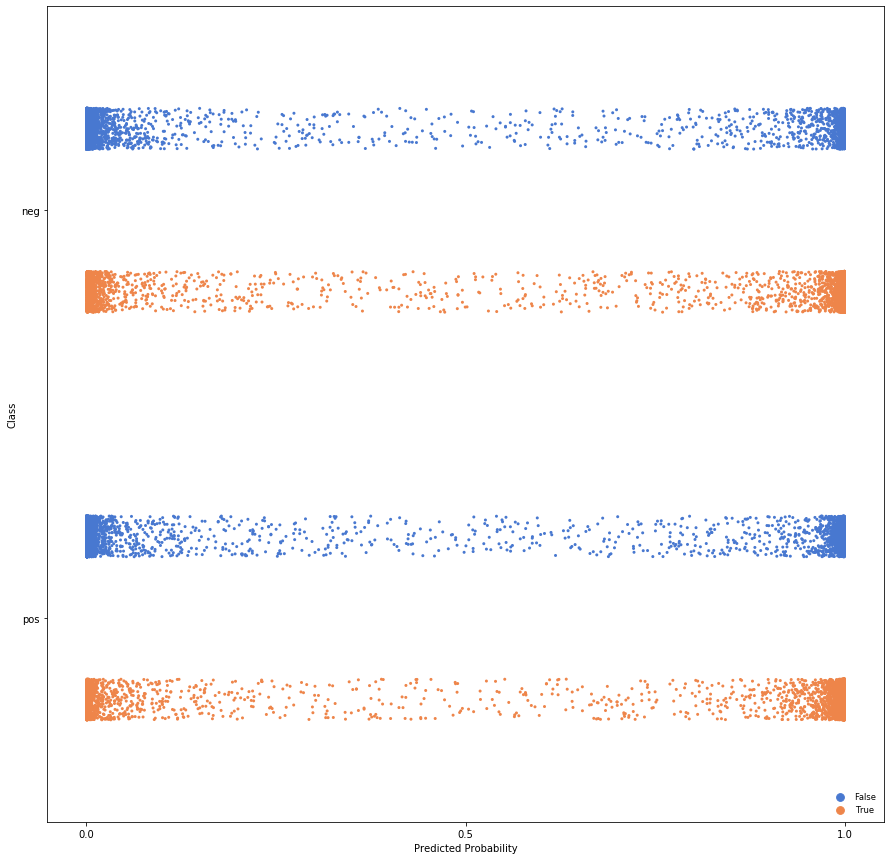

In [6]:
evaluate_model(MTDNN, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "mtdnn_model": ["mt-dnn-base"],
    "max_seq_length": [128],
}, run_kwargs={"train_batch_size": 16});

(pid=713) INFO:gobbli.experiment.base:Starting build.
(pid=713) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=713) INFO:gobbli.experiment.base:Starting training.
(pid=702) INFO:gobbli.experiment.base:Starting build.
(pid=702) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=702) INFO:gobbli.experiment.base:Starting training.
(pid=705) INFO:gobbli.experiment.base:Starting build.
(pid=705) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=705) INFO:gobbli.experiment.base:Starting training.
(pid=708) INFO:gobbli.experiment.base:Starting build.
(pid=708) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=708) INFO:gobbli.experiment.base:Starting training.
(pid=703) INFO:gobbli.experiment.base:Starting build.
(pid=703) INFO:gobbli.experiment.base:Build finished in 0.00 sec.
(pid=703) INFO:gobbli.experiment.base:Starting training.
(pid=710) INFO:gobbli.experiment.base:Starting build.
(pid=710) INFO:gobbli.experiment.base:Build finished in 0.00 

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,-0.8750,0.8750,0.367996,"[neg, pos]",benchmark_data/model/FastText/2b9061d04c124e67...,192.168.176.2,"{'dim': 100, 'lr': 0.5, 'word_ngrams': 1}"
1,-0.8818,0.8818,0.276937,"[neg, pos]",benchmark_data/model/FastText/0646cf4cec3449b6...,192.168.176.2,"{'dim': 100, 'lr': 0.5, 'word_ngrams': 2}"
2,-0.8724,0.8724,0.393610,"[neg, pos]",benchmark_data/model/FastText/d54172b803304f13...,192.168.176.2,"{'dim': 100, 'lr': 1.0, 'word_ngrams': 1}"
3,-0.8842,0.8842,0.207343,"[neg, pos]",benchmark_data/model/FastText/79dbaf49f1ec455a...,192.168.176.2,"{'dim': 100, 'lr': 1.0, 'word_ngrams': 2}"
4,-0.8726,0.8726,0.321396,"[neg, pos]",benchmark_data/model/FastText/dc38a7ad85164d42...,192.168.176.2,"{'dim': 300, 'lr': 0.5, 'word_ngrams': 1}"
5,-0.8794,0.8794,0.250647,"[neg, pos]",benchmark_data/model/FastText/d8fb17697f4c4df8...,192.168.176.2,"{'dim': 300, 'lr': 0.5, 'word_ngrams': 2}"
6,-0.8708,0.8708,0.329894,"[neg, pos]",benchmark_data/model/FastText/af30a56b112b4a6c...,192.168.176.2,"{'dim': 300, 'lr': 1.0, 'word_ngrams': 1}"
7,-0.8876,0.8876,0.193221,"[neg, pos]",benchmark_data/model/FastText/9f729cd988ba4417...,192.168.176.2,"{'dim': 300, 'lr': 1.0, 'word_ngrams': 2}"


(pid=708) INFO:gobbli.experiment.base:Prediction finished in 5.74 sec.
Metrics:
--------
Weighted F1 Score: 0.885215532542917
Weighted Precision Score: 0.8855687513401427
Weighted Recall Score: 0.88524
Accuracy: 0.88524

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.90      0.87      0.88     12500
         pos       0.87      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000




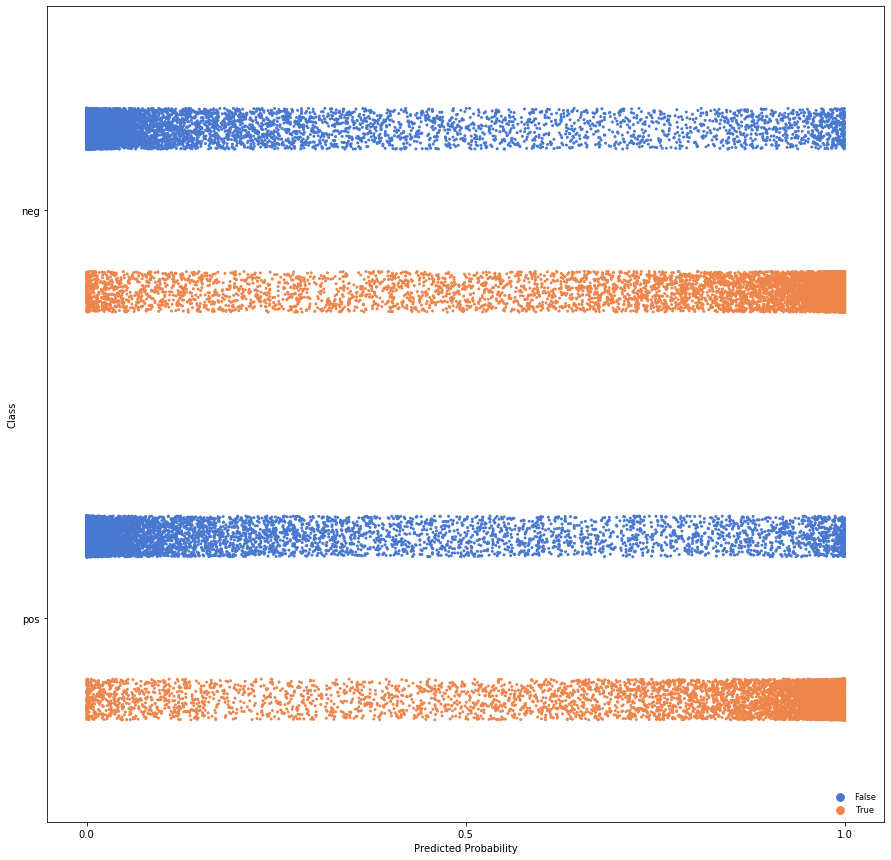

In [7]:
evaluate_model(FastText, X_train_valid_fasttext, y_train_valid, (X_test_fasttext, y_test), {
    "word_ngrams": [1, 2],
    "dim": [100, 300],
    "lr": [0.5, 1.0],
});

(pid=1131) INFO:gobbli.experiment.base:Starting build.
(pid=1131) INFO:gobbli.experiment.base:Build finished in 0.33 sec.
(pid=1131) INFO:gobbli.experiment.base:Starting training.
(pid=1131) INFO:gobbli.experiment.base:Training finished in 3259.59 sec.
(pid=1131) INFO:gobbli.experiment.base:RESULTS:
(pid=1131) INFO:gobbli.experiment.base:  Validation loss: 0.021786364376544954
(pid=1131) INFO:gobbli.experiment.base:  Validation accuracy: 0.4944
(pid=1131) INFO:gobbli.experiment.base:  Training loss: 0.04382764927148819
(pid=1131) INFO:gobbli.experiment.base:Starting build.
(pid=1131) INFO:gobbli.experiment.base:Build finished in 0.25 sec.
(pid=1131) INFO:gobbli.experiment.base:Starting training.
(pid=1131) INFO:gobbli.experiment.base:Training finished in 2269.18 sec.
(pid=1131) INFO:gobbli.experiment.base:RESULTS:
(pid=1131) INFO:gobbli.experiment.base:  Validation loss: 0.021231974666565658
(pid=1131) INFO:gobbli.experiment.base:  Validation accuracy: 0.8408
(pid=1131) INFO:gobbli.exp

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.021786,0.4944,0.043828,"[neg, pos]",benchmark_data/model/Transformer/8ae100decfe94...,192.168.176.2,"{'transformer_model': 'XLM', 'transformer_weig..."
1,0.021232,0.8408,0.010213,"[neg, pos]",benchmark_data/model/Transformer/d5d5d260e0534...,192.168.176.2,"{'transformer_model': 'XLM', 'transformer_weig..."


(pid=1131) INFO:gobbli.experiment.base:Prediction finished in 150.94 sec.
Metrics:
--------
Weighted F1 Score: 0.827309058025611
Weighted Precision Score: 0.8274029791064038
Weighted Recall Score: 0.82732
Accuracy: 0.82732

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.83      0.82      0.83     12500
         pos       0.82      0.84      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000




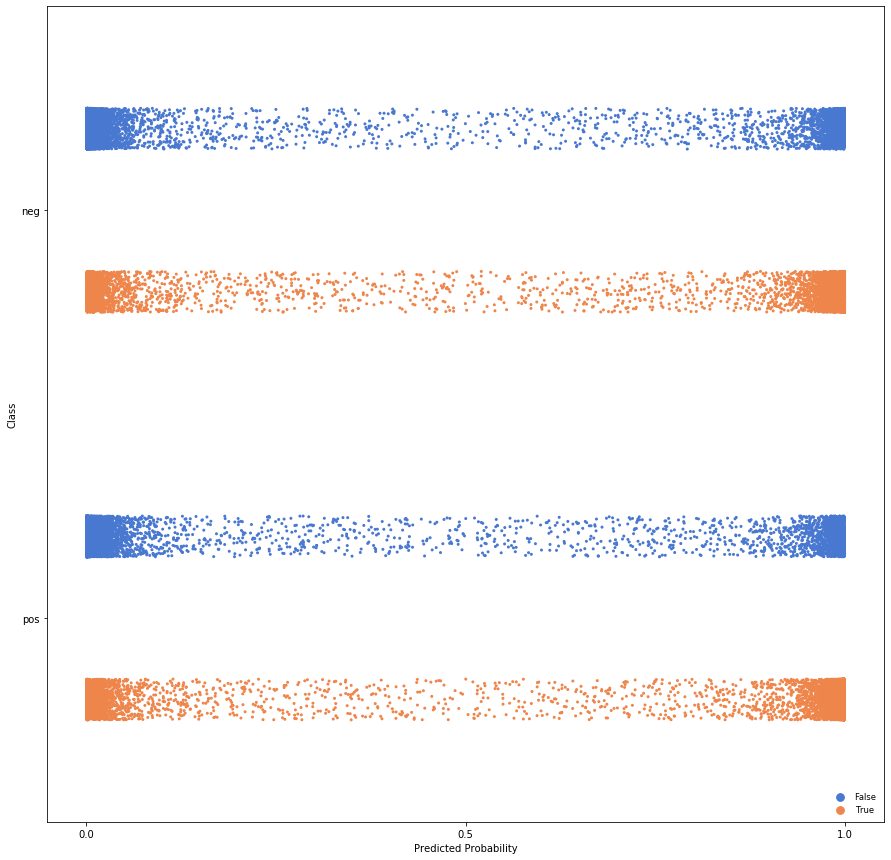

In [8]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlm-mlm-tlm-xnli15-1024", "xlm-clm-ende-1024"],
    "transformer_model": ["XLM"],
}, run_kwargs={"train_batch_size": 16});

(pid=1441) INFO:gobbli.experiment.base:Starting build.
(pid=1441) INFO:gobbli.experiment.base:Build finished in 0.28 sec.
(pid=1441) INFO:gobbli.experiment.base:Starting training.
(pid=1441) INFO:gobbli.experiment.base:Training finished in 2698.72 sec.
(pid=1441) INFO:gobbli.experiment.base:RESULTS:
(pid=1441) INFO:gobbli.experiment.base:  Validation loss: 0.02050976786389947
(pid=1441) INFO:gobbli.experiment.base:  Validation accuracy: 0.8932
(pid=1441) INFO:gobbli.experiment.base:  Training loss: 0.0024803909122012554
(pid=1441) INFO:gobbli.experiment.base:Starting build.
(pid=1441) INFO:gobbli.experiment.base:Build finished in 0.24 sec.
(pid=1441) INFO:gobbli.experiment.base:Starting prediction.
(pid=1441) INFO:gobbli.experiment.base:Prediction finished in 178.70 sec.

,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.02051,0.8932,0.00248,"[neg, pos]",benchmark_data/model/Transformer/97605ec55d794...,192.168.176.2,"{'transformer_model': 'XLNet', 'transformer_we..."



Metrics:
--------
Weighted F1 Score: 0.8905590922533348
Weighted Precision Score: 0.8905729582733803
Weighted Recall Score: 0.89056
Accuracy: 0.89056

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89     12500
         pos       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000




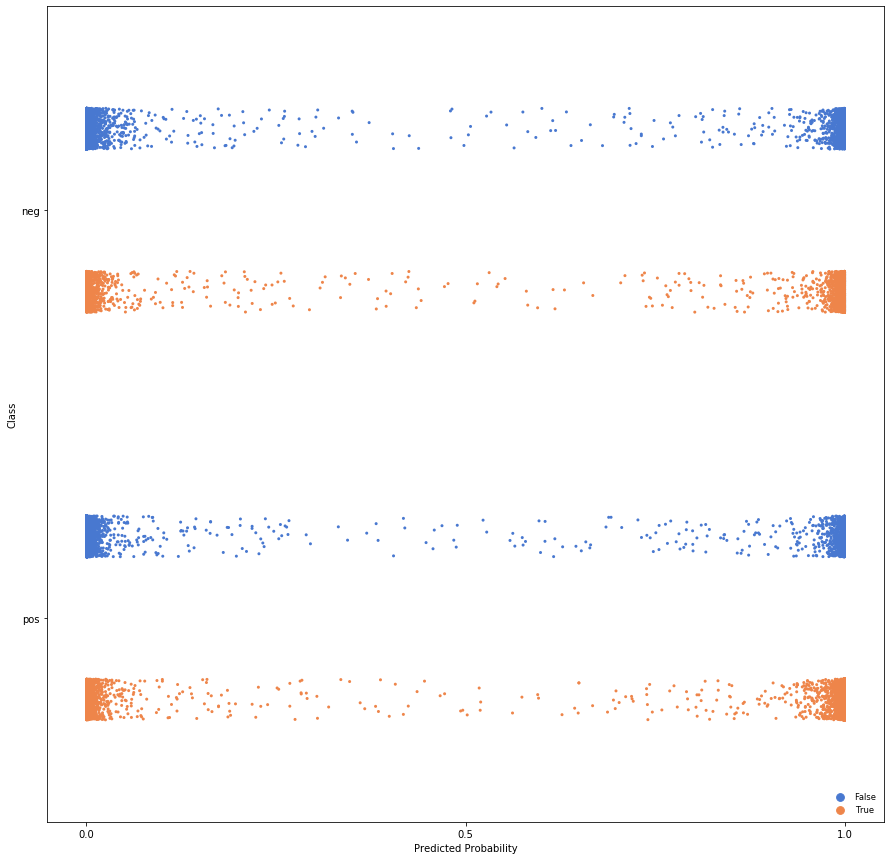

In [9]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["xlnet-base-cased"],
    "transformer_model": ["XLNet"],
}, run_kwargs={"train_batch_size": 16});

(pid=1754) INFO:gobbli.experiment.base:Starting build.
(pid=1754) INFO:gobbli.experiment.base:Build finished in 0.31 sec.
(pid=1754) INFO:gobbli.experiment.base:Starting training.
(pid=1754) INFO:gobbli.experiment.base:Training finished in 1971.41 sec.
(pid=1754) INFO:gobbli.experiment.base:RESULTS:
(pid=1754) INFO:gobbli.experiment.base:  Validation loss: 0.016514102275669573
(pid=1754) INFO:gobbli.experiment.base:  Validation accuracy: 0.9034
(pid=1754) INFO:gobbli.experiment.base:  Training loss: 0.0039536376479081805
(pid=1754) INFO:gobbli.experiment.base:Starting build.
(pid=1754) INFO:gobbli.experiment.base:Build finished in 0.24 sec.
(pid=1754) INFO:gobbli.experiment.base:Starting prediction.


,valid_loss,valid_accuracy,train_loss,labels,checkpoint,node_ip_address,model_params
0,0.016514,0.9034,0.003954,"[neg, pos]",benchmark_data/model/Transformer/7d5ac0cfec034...,192.168.176.2,"{'transformer_model': 'Roberta', 'transformer_..."


(pid=1754) INFO:gobbli.experiment.base:Prediction finished in 133.69 sec.
Metrics:
--------
Weighted F1 Score: 0.8929560429702668
Weighted Precision Score: 0.8930181138592167
Weighted Recall Score: 0.89296
Accuracy: 0.89296

Classification Report:
----------------------
              precision    recall  f1-score   support

         neg       0.90      0.89      0.89     12500
         pos       0.89      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000




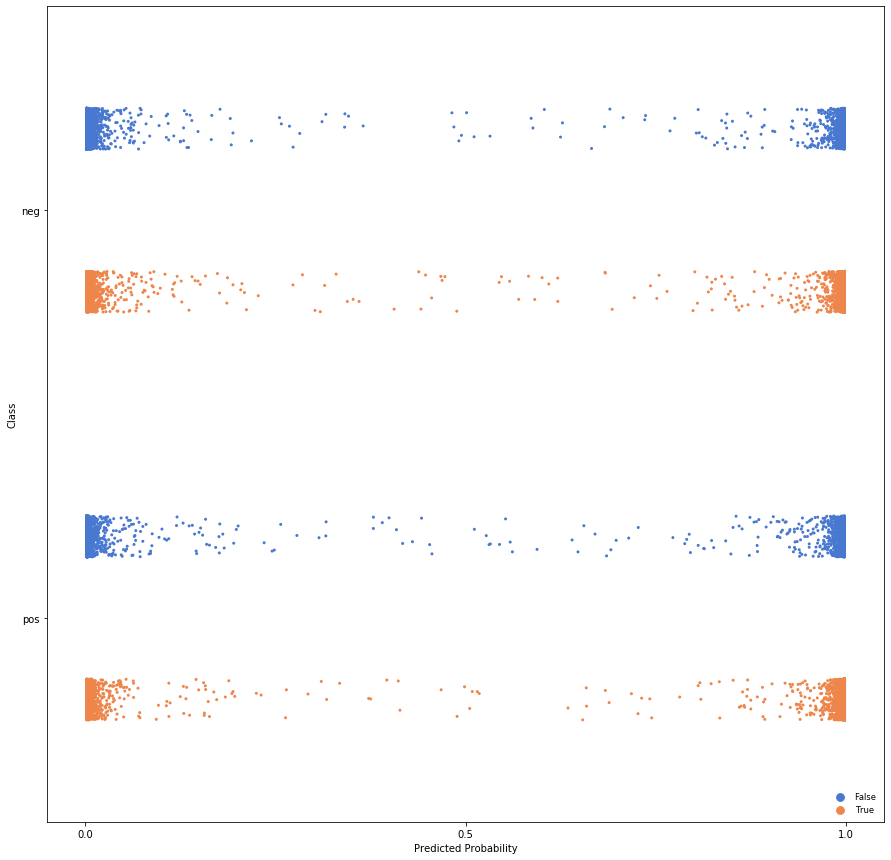

In [10]:
evaluate_model(Transformer, X_train_valid_bert, y_train_valid, (X_test_bert, y_test), {
    "transformer_weights": ["roberta-base"],
    "transformer_model": ["Roberta"],
}, run_kwargs={"train_batch_size": 16});